In [1]:
import numpy.ma as ma
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate

pd.set_option("display.precision", 1)

# Get Directory

In [2]:
import os
import pandas as pd
import json

cwd = os.getcwd()

#Main Program

# Inisialisasi

In [3]:
data  = pd.read_csv(cwd + '/Data/data.csv')
user_ = pd.read_csv(cwd + '/Data/user_side_data.csv')
item_ = pd.read_csv(cwd + '/Data/speaker_side_data.csv')

y_train = data['rating'].to_numpy()
for i in range (len(user_)):
    data_i = data[data['user_id'] == f'user_{i}']
    idx_speaker_i = data[data['user_id'] == f'user_{i}']['speaker_id'].to_numpy()

    speaker_iz = item_[item_['speaker id'].isin(idx_speaker_i)]

    for j in range(len(speaker_iz)):
        for k in range (len(idx_speaker_i)):
            if idx_speaker_i[j] == speaker_iz['speaker id'].to_numpy()[k]:
                speaker_izz = speaker_iz[speaker_iz['speaker id'] == idx_speaker_i[j]]
                break
        if j == 0:
            speaker_i = speaker_izz.copy().reset_index().iloc[:,1:]
        else:
            speaker_i = speaker_i._append(speaker_izz).reset_index().iloc[:,1:]

    user_i    = user_.iloc[[i for j in range (len(speaker_i))],:]

    if i == 0:
        user = user_i.copy()
        speaker = speaker_i.copy()
    else:
        user = user._append(user_i)
        speaker = speaker._append(speaker_i)

In [5]:
user = user.reset_index().iloc[:,1:]
item = speaker.reset_index().iloc[:,1:]

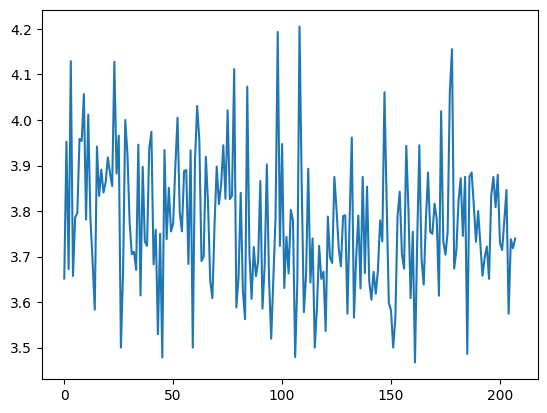

In [7]:
import matplotlib.pyplot as plt
plt.plot(item_['rating ave'].to_numpy())

In [8]:
data

,user_id,speaker_id,rating,full name,experience,category 1,category 2,category 3
0,user_0,speaker_95,4.5,Alexander Aguilar,Fitness Associate,Sport,NaN,NaN
1,user_0,speaker_78,4.5,Alvin Lin,Computer Science Curriculum Designer and Acade...,Sport,Academic,NaN
2,user_0,speaker_90,4.5,Anna Lofgren,Assistant Volleyball Coach,Sport,NaN,NaN
3,user_0,speaker_92,5.0,Ashley Sandy,Job Coach,Sport,NaN,NaN
4,user_0,speaker_40,3.5,"Aamie Benson, M.B.A., CPCC",Sr. Instructional Design Consultant | Facilita...,Business,Sport,NaN
...,...,...,...,...,...,...,...,...
10600,user_999,speaker_39,4.5,"Dr. Apostolos Ampountolas, Ph.D., CQF",Assistant Professor of Finance and Revenue Man...,Business,Academic,NaN
10601,user_999,speaker_84,4.5,Aarica Humke,Scholar Coach,Sport,Academic,NaN
10602,user_999,speaker_180,2.5,AAPG Wildcatters,Outstanding Domestic Student Chapter Award (2018),Academic,NaN,NaN
10603,user_999,speaker_138,2.5,Ashley G.,Registered Nurse - Labor and Delivery,Healthcare,NaN,NaN


In [9]:
item

,speaker id,rating ave,Business,Entertainment,Politics,Sport,Tech,Healthcare,Academic,Media & News
0,speaker_95,3.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,speaker_78,4.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,speaker_90,3.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,speaker_92,3.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,speaker_40,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10600,speaker_39,3.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10601,speaker_84,4.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10602,speaker_180,3.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10603,speaker_138,3.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
user

,user id,rating count,rating ave,Business,Entertainment,Politics,Sport,Tech,Healthcare,Academic,Media & News
0,user_0,8,3.7,3.5,3.0,0.0,4.4,0.0,2.2,4.5,0.0
1,user_0,8,3.7,3.5,3.0,0.0,4.4,0.0,2.2,4.5,0.0
2,user_0,8,3.7,3.5,3.0,0.0,4.4,0.0,2.2,4.5,0.0
3,user_0,8,3.7,3.5,3.0,0.0,4.4,0.0,2.2,4.5,0.0
4,user_0,8,3.7,3.5,3.0,0.0,4.4,0.0,2.2,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10600,user_999,13,3.8,4.5,0.0,0.0,4.0,0.0,2.8,3.8,0.0
10601,user_999,13,3.8,4.5,0.0,0.0,4.0,0.0,2.8,3.8,0.0
10602,user_999,13,3.8,4.5,0.0,0.0,4.0,0.0,2.8,3.8,0.0
10603,user_999,13,3.8,4.5,0.0,0.0,4.0,0.0,2.8,3.8,0.0


In [11]:
y_train = np.array(y_train)
y_train

array([4.5, 4.5, 4.5, ..., 2.5, 2.5, 3. ])

In [ ]:
u_s = 3
i_s = 1

num_user_features = user.shape[1] - u_s
num_item_features = item.shape[1] - i_s

In [ ]:
user_train = user.iloc[:,u_s:]
item_train = item.iloc[:,i_s:]

print(np.shape(user_train))
print(np.shape(item_train))
print(len(y_train))

(10625, 8)
(10625, 9)
10625


# Persiapan

In [ ]:
# scale training data

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))

In [ ]:
item_train, item_test = train_test_split(item_train, train_size=0.90, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.90, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.90, shuffle=True, random_state=1)
print(f"speaker/item training data shape: {item_train.shape}")
print(f"speaker/item test data shape: {item_test.shape}")

speaker/item training data shape: (9562, 9)
speaker/item test data shape: (1063, 9)


# Model Content Based

In [ ]:

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_outputs, kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ### END CODE HERE ###
])

item_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_outputs, kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ### END CODE HERE ###
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   22112     ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   22368     ['input_2[0][0]']             
                                                                                              

In [ ]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [ ]:
tf.random.set_seed(1)
model.fit([user_train, item_train], y_train, epochs=1000, validation_data = ([user_test, item_test], y_test))

In [ ]:
model.evaluate([user_test, item_test], y_test)

In [ ]:
model.save(cwd + '\Model\keras.h5')

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(cwd + '\Model\model.tflite', 'wb') as f:
  f.write(tflite_model)

#Test Model

In [ ]:
new_user_id = 400
new_rating_count = 3
new_rating_ave = 0.0
new_bisnis = 0
new_entertainment = 0
new_politics = 0
new_sport = 0
new_tech = 0
new_healthcare = 0
new_academic = 4
new_media = 5

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_bisnis, new_entertainment, new_politics,
                      new_sport, new_tech, new_healthcare, new_academic,
                      new_media]])[0]

In [ ]:
# generate and replicate the user vector to match the number movies in the data set.
user_vecs = np.array([user_vec[u_s:] for i in range (len(item_))]).astype('float32')
item_vecs = item_.to_numpy()[:, i_s:].astype('float32')

# make a prediction
y_p = model.predict([user_vecs, item_vecs])

# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display

7/7 [==============================] - 0s 3ms/step


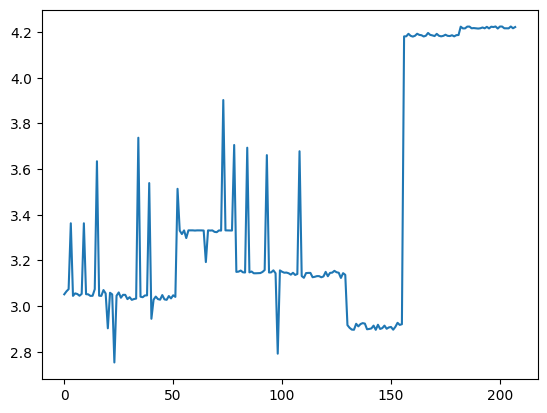

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_pu)

In [ ]:
item_.iloc[sorted_index,:].head(50)

,speaker id,rating ave,Business,Entertainment,Politics,Sport,Tech,Healthcare,Academic,Media & News
198,speaker_198,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,speaker_205,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,speaker_200,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,speaker_201,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
186,speaker_186,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
185,speaker_185,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
182,speaker_182,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,speaker_196,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,speaker_194,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
207,speaker_207,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
